<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Surabhi_HW3a_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( 'ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Load the CSV file from your GitHub
df = pd.read_csv('https://raw.githubusercontent.com/sparab2/MachineLearning/main/Housing.csv')

# Show the first 5 rows of the DataFrame
print(df.head())
df.head() # To get first n rows from the dataset default value of n is 5
m=len(df)
m

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


545

In [ ]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'
# But in order to fit a regression Line, we would need numerical values and n
# List of variables to map
num_vars_b =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
# Defining the map function
def binary_map(v1) :
  return v1.map({'yes' : 1, "no": 0})
# Applying the function to the housing List
df[num_vars_b] = df [num_vars_b] . apply(binary_map)
#Check the housing dataframe now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
num_vars_c =['furnishingstatus']
# Defining the map function
def binary_map(v2) :
  return v2.map({'furnished' : 1, "unfurnished": 0, "semi-furnished": 0.5})
# Applying the function to the housing List
df[num_vars_c] = df [num_vars_c] . apply(binary_map)
#Check the housing dataframe now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(436)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [ ]:
num_vars_a = ['price','area','bedrooms','bathrooms','stories','parking']

In [ ]:
df_train_one = df_train[num_vars_a]
df_test_one = df_test[num_vars_a]
df_train_one.head()

,price,area,bedrooms,bathrooms,stories,parking
245,4550000,5360,3,1,2,2
182,5145000,3410,3,1,2,0
424,3360000,3100,3,1,2,0
246,4550000,3520,3,1,1,0
323,4025000,5400,3,1,1,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = StandardScalar()
scaler = MinMaxScaler()
df_train_one[num_vars_a] = scaler.fit_transform(df_train_one[num_vars_a])
df_test_one[num_vars_a] = scaler.fit_transform(df_test_one[num_vars_a])
df_train_one.head(6)

,price,area,bedrooms,bathrooms,stories,parking
245,0.242424,0.254983,0.4,0.0,0.333333,0.666667
182,0.293939,0.120962,0.4,0.0,0.333333,0.000000
424,0.139394,0.099656,0.4,0.0,0.333333,0.000000
246,0.242424,0.128522,0.4,0.0,0.000000,0.000000
323,0.196970,0.257732,0.4,0.0,0.000000,1.000000
460,0.115758,0.443299,0.2,0.0,0.000000,0.333333


In [ ]:
X_train = df_train_one.iloc[:,1:6]
Y_train = df_train_one.iloc[:,0]
X_test = df_test_one.iloc[:,1:6]
Y_test = df_test_one.iloc[:,0]

In [ ]:
#Lets create a matrix with single column of ones
X_1 = np.ones((436,1))
X_2 = np.ones((109,1))

In [ ]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_G1 = X_train.values.reshape(436,5)
X_G2 = X_test.values.reshape(109,5)

In [ ]:
X_train1 = np.hstack((X_1,X_G1))
X_test1 = np.hstack((X_2,X_G2))

In [ ]:
theta = np.zeros(6)
theta
Y_train.shape

(436,)

In [ ]:
# Lets compute the cost for theta values 
def compute_cost(X, Y, theta, lamda):
 #   m = len(Y)
    predictions = X.dot(theta)
 #   cost = (1 / (2 * m)) * np.sum(np.square(predictions - Y))
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors)
    sqrErrors1 = np.sum(sqrErrors)
    reg_term = lamda * np.sum(np.square(theta))
    cost = (1 / (2 * m)) * np.sum(sqrErrors1 + reg_term)
    return cost

In [ ]:
def gradient_descent(X, X2, Y, Y2, theta, alpha, iterations, lamda): 
   cost_history = np.zeros(iterations)
   cost_history2 = np.zeros(iterations)
   lamda = 2 
 
   for i in range(iterations): 
    # predictions = X.transpose().dot(theta)
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, Y, theta, lamda)
    cost_history2[i] = compute_cost(X2, Y2, theta, lamda) 
 
   return theta, cost_history, cost_history2

In [ ]:
theta = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
iterations = 3000;
#iterations = 7500; 
alpha = 0.1;
lamda = 2;

In [ ]:
theta, cost_history, cost_history2 = gradient_descent(X_train1, X_test1, Y_train, Y_test, theta, alpha, iterations, lamda)
print('Final value of theta =', theta) 
print('cost_history =', cost_history[-1], 'cost_history2 =', cost_history2[-1])

Final value of theta = [0.04483459 0.39731668 0.08032809 0.32205262 0.13847481 0.08958471]
cost_history = 0.0052570579745724304 cost_history2 = 0.002411443506826293


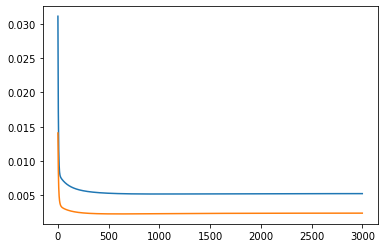

In [ ]:
plt.plot(cost_history, label = "first line")
plt.plot(cost_history2, label = "second line")